In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = yf.download(
    ["AAPL", "NVDA", "SPY"],
    start="2020-01-01",
    end="2023-01-01"
)

returns = data["Adj Close"].pct_change().dropna()

benchmark_rets = returns.pop("SPY")
portfolio_returns = returns.sum(axis=1)

[*********************100%%**********************]  3 of 3 completed


In [5]:
# Calculate KPIs
def calculate_kpis(portfolio_returns, benchmark_rets):
    kpis = {}
    kpis['Annual Return'] = np.mean(portfolio_returns) * 252
    kpis['Cumulative Returns'] = np.prod(1 + portfolio_returns) - 1
    kpis['Annual Volatility'] = np.std(portfolio_returns) * np.sqrt(252)
    kpis['Sharpe Ratio'] = kpis['Annual Return'] / kpis['Annual Volatility']
    kpis['Max Drawdown'] = (portfolio_returns.cumsum() - portfolio_returns.cumsum().cummax()).min()
    kpis['Skew'] = skew(portfolio_returns)
    kpis['Kurtosis'] = kurtosis(portfolio_returns)

    # Calculate Alpha and Beta
    cov_matrix = np.cov(portfolio_returns, benchmark_rets)
    beta = cov_matrix[0, 1] / cov_matrix[1, 1]
    alpha = kpis['Annual Return'] - beta * (np.mean(benchmark_rets) * 252)
    kpis['Alpha'] = alpha
    kpis['Beta'] = beta

    # Calculate Calmar Ratio
    kpis['Calmar Ratio'] = kpis['Annual Return'] / abs(kpis['Max Drawdown'])

    return kpis

Annual Return: 71.309%
Cumulative Returns: 174.957%
Annual Volatility: 86.232%
Sharpe Ratio: 0.83
Max Drawdown: -1.07
Skew: -0.09
Kurtosis: 3.12
Alpha: 41.697%
Beta: 2.91
Calmar Ratio: 0.67


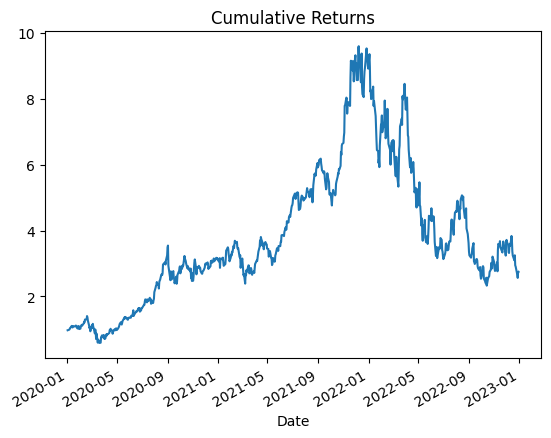

In [8]:
kpis = calculate_kpis(portfolio_returns, benchmark_rets)

# Display KPIs
for key, value in kpis.items():
    if key in ['Annual Return', 'Cumulative Returns', 'Annual Volatility', 'Alpha']:
        print(f"{key}: {value:.3%}")
    else:
        print(f"{key}: {value:.2f}")

# Plot cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.plot(title="Cumulative Returns")
plt.show()